In [1]:
    from pypo import AIS2AOS_map
    import numpy as np

C:\Users\vc00004\Anaconda3\envs\pypo-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

In [3]:
    AIS_bounds =  np.array([[0, 10], [0, 10]])
    resolution =  [5, 5]

[[[  0.       90.     ]
  [  2.5     120.     ]
  [  5.      120.     ]
  [  7.5     120.     ]
  [ 10.      120.     ]]

 [[  2.5      60.     ]
  [  5.       90.     ]
  [  7.5     100.     ]
  [ 10.      105.     ]
  [ 12.5     108.     ]]

 [[  5.       60.     ]
  [  7.5      80.     ]
  [ 10.       90.     ]
  [ 12.5      96.     ]
  [ 15.      100.     ]]

 [[  7.5      60.     ]
  [ 10.       75.     ]
  [ 12.5      84.     ]
  [ 15.       90.     ]
  [ 17.5      94.28571]]

 [[ 10.       60.     ]
  [ 12.5      72.     ]
  [ 15.       80.     ]
  [ 17.5      85.71429]
  [ 20.       90.     ]]]


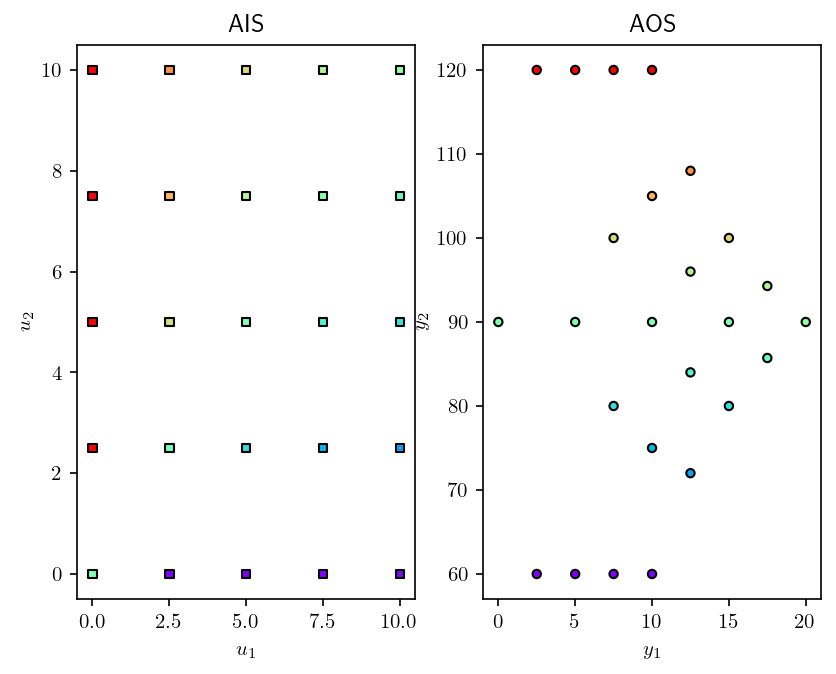

In [4]:
    AIS, AOS =  AIS2AOS_map(shower_problem, AIS_bounds,  resolution, plot = True)
    print(AOS)

In [5]:
    import numpy as np
    from pypo import nlp_based_approach

In [6]:
    lb = np.array([0, 0])
    ub = np.array([100,100])

In [7]:
    DOS_bound = np.array([[17.5, 21.0],
                          [80.0, 100.0]])
    resolution = [5, 5]

In [8]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

  0%|                                                                                           | 0/25 [00:00<?, ?it/s]

  8%|██████▋                                                                            | 2/25 [00:00<00:01, 12.80it/s]

 16%|█████████████▎                                                                     | 4/25 [00:00<00:01, 12.80it/s]

 24%|███████████████████▉                                                               | 6/25 [00:00<00:01, 12.80it/s]

 32%|██████████████████████████▌                                                        | 8/25 [00:00<00:01, 12.80it/s]

 40%|████████████████████████████████▊                                                 | 10/25 [00:00<00:01, 13.28it/s]

 48%|███████████████████████████████████████▎                                          | 12/25 [00:00<00:00, 13.11it/s]

 56%|█████████████████████████████████████████████▉                                    | 14/25 [00:01<00:00, 13.01it/s]

 64%|████████████████████████████████████████████████████▍                             | 16/25 [00:01<00:00, 12.54it/s]

 72%|███████████████████████████████████████████████████████████                       | 18/25 [00:01<00:00, 10.72it/s]

 80%|█████████████████████████████████████████████████████████████████▌                | 20/25 [00:01<00:00,  9.83it/s]

 88%|████████████████████████████████████████████████████████████████████████▏         | 22/25 [00:01<00:00, 10.11it/s]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 24/25 [00:02<00:00, 10.75it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:02<00:00, 11.57it/s]

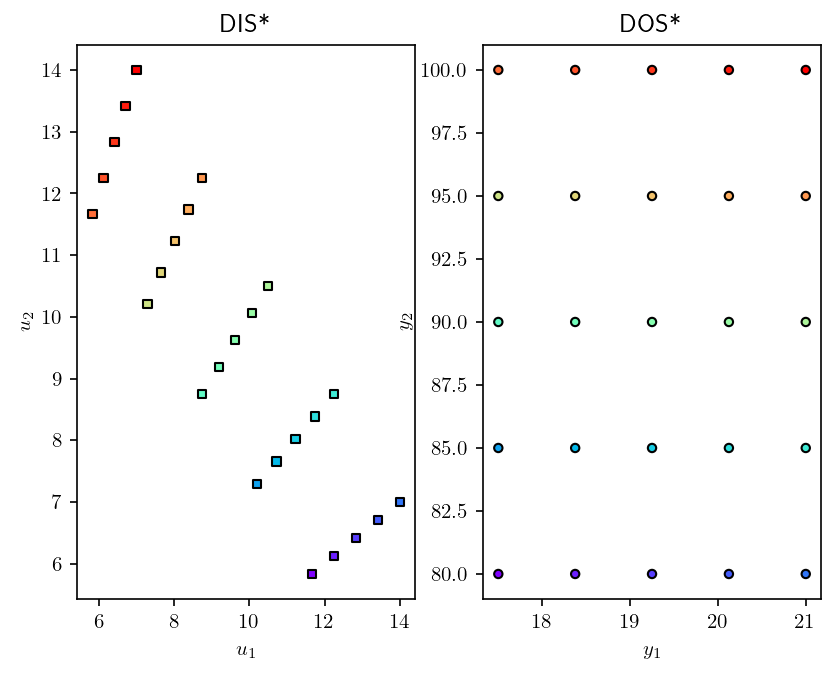

In [9]:
    u0 = u0 = np.array([0, 10]) # Initial estimate for inverse mapping.
    fDIS, fDOS, message = nlp_based_approach(DOS_bound, 
                                             resolution, 
                                             shower_problem, 
                                             u0, 
                                             lb,
                                             ub, 
                                             method='ipopt', 
                                             plot=True, 
                                             ad=False,
                                             warmstart=False)

In [10]:
    from pypo import multimodel_rep
    import numpy as np

In [11]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

In [12]:
    AIS_bounds =  np.array([[1, 10], [1, 10]])
    AIS_resolution =  [5, 5]

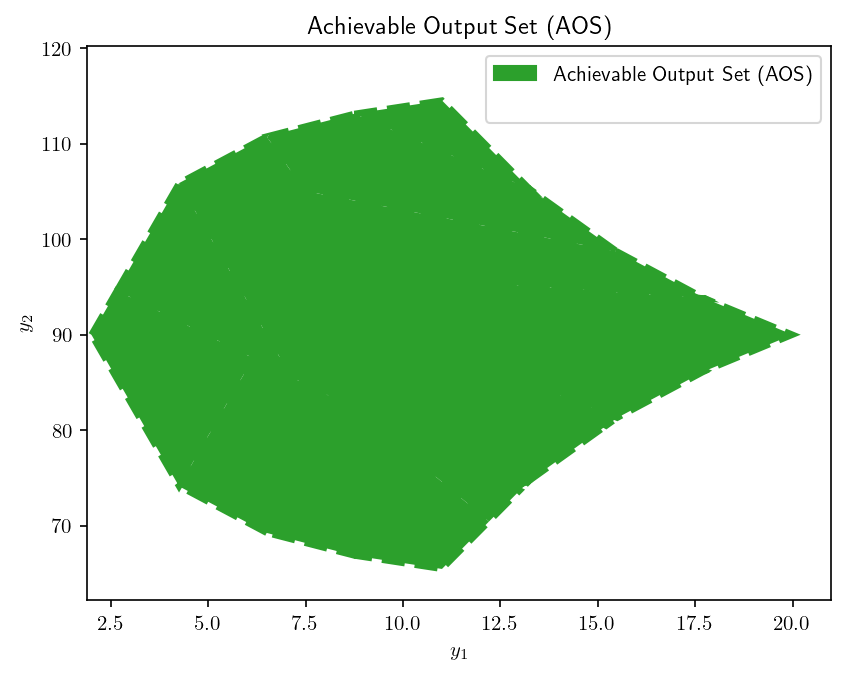

In [13]:
    AOS_region  =  multimodel_rep(AIS_bounds, AIS_resolution, shower_problem)

In [14]:
    from pypo import multimodel_rep, OI_eval
    import numpy as np

In [15]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

In [16]:
    AIS_bounds =  np.array([[1, 10], [1, 10]])
    AIS_resolution =  [5, 5]

In [17]:
    AOS_region  =  multimodel_rep(AIS_bounds, AIS_resolution, shower_problem,
    plotting=False)

Either plotting is not possible (dimension > 3) or you have chosen plotting=False. The operability set is still returned as a polytopic region of general dimension.


In [18]:
    DOS_bounds =  np.array([[10, 20], 
                            [70, 100]])

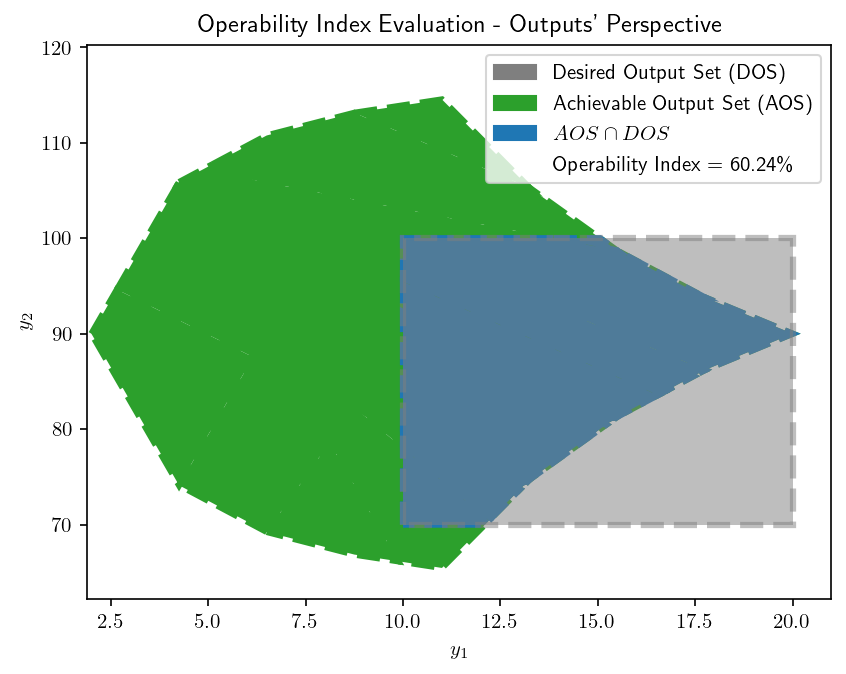

In [19]:
    OI = OI_eval(AOS_region, DOS_bounds)

In [20]:
    from pypo import create_grid
    DOS_bounds =  np.array([[10, 20], 
                            [70, 100]])

    DOS_resolution =  [3, 3]

    DOSPts = create_grid(DOS_bounds, DOS_resolution)

    print(DOSPts)

[[[ 10.  70.]
  [ 10.  85.]
  [ 10. 100.]]

 [[ 15.  70.]
  [ 15.  85.]
  [ 15. 100.]]

 [[ 20.  70.]
  [ 20.  85.]
  [ 20. 100.]]]


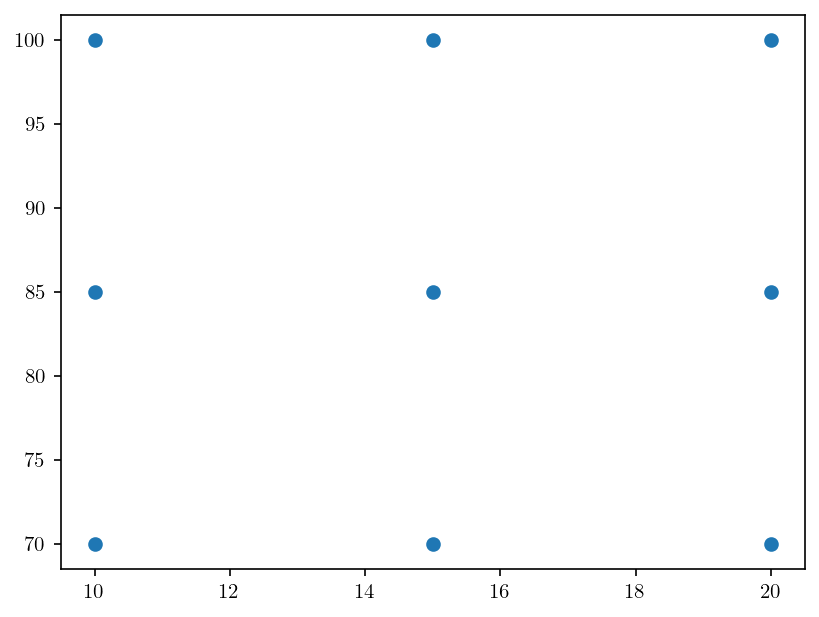

In [21]:
    import matplotlib.pyplot as plt
    DOSPts = DOSPts.reshape(-1, 2)
    plt.scatter(DOSPts[:, 0], DOSPts[:, 1])

In [22]:
    from pypo import points2simplices
    AIS_poly, AOS_poly = points2simplices(AIS,AOS)
    print('AIS Simplices \n', AIS_poly)
    print('AOS Simplices \n', AOS_poly)

AIS Simplices 
 [array([[2.5, 0. , 0. ],
       [2.5, 2.5, 0. ]]), array([[2.5, 2.5, 0. ],
       [2.5, 0. , 0. ]]), array([[5. , 2.5, 2.5],
       [2.5, 2.5, 0. ]]), array([[5. , 5. , 2.5],
       [2.5, 0. , 0. ]]), array([[7.5, 5. , 5. ],
       [2.5, 2.5, 0. ]]), array([[7.5, 7.5, 5. ],
       [2.5, 0. , 0. ]]), array([[10. ,  7.5,  7.5],
       [ 2.5,  2.5,  0. ]]), array([[10. , 10. ,  7.5],
       [ 2.5,  0. ,  0. ]]), array([[2.5, 0. , 0. ],
       [5. , 5. , 2.5]]), array([[2.5, 2.5, 0. ],
       [5. , 2.5, 2.5]]), array([[5. , 2.5, 2.5],
       [5. , 5. , 2.5]]), array([[5. , 5. , 2.5],
       [5. , 2.5, 2.5]]), array([[7.5, 5. , 5. ],
       [5. , 5. , 2.5]]), array([[7.5, 7.5, 5. ],
       [5. , 2.5, 2.5]]), array([[10. ,  7.5,  7.5],
       [ 5. ,  5. ,  2.5]]), array([[10. , 10. ,  7.5],
       [ 5. ,  2.5,  2.5]]), array([[2.5, 0. , 0. ],
       [7.5, 7.5, 5. ]]), array([[2.5, 2.5, 0. ],
       [7.5, 5. , 5. ]]), array([[5. , 2.5, 2.5],
       [7.5, 7.5, 5. ]]), array([[5

In [23]:
    from pypo import points2polyhedra
    AIS_poly, AOS_poly = points2polyhedra(AIS,AOS)
    print('AIS Polyhedrons \n', AIS_poly)
    print('AOS Polyhedrons \n', AOS_poly)

AIS Polyhedrons 
 [array([[0. , 0. , 2.5, 2.5],
       [0. , 2.5, 0. , 2.5]]), array([[2.5, 2.5, 5. , 5. ],
       [0. , 2.5, 0. , 2.5]]), array([[5. , 5. , 7.5, 7.5],
       [0. , 2.5, 0. , 2.5]]), array([[ 7.5,  7.5, 10. , 10. ],
       [ 0. ,  2.5,  0. ,  2.5]]), array([[0. , 0. , 2.5, 2.5],
       [2.5, 5. , 2.5, 5. ]]), array([[2.5, 2.5, 5. , 5. ],
       [2.5, 5. , 2.5, 5. ]]), array([[5. , 5. , 7.5, 7.5],
       [2.5, 5. , 2.5, 5. ]]), array([[ 7.5,  7.5, 10. , 10. ],
       [ 2.5,  5. ,  2.5,  5. ]]), array([[0. , 0. , 2.5, 2.5],
       [5. , 7.5, 5. , 7.5]]), array([[2.5, 2.5, 5. , 5. ],
       [5. , 7.5, 5. , 7.5]]), array([[5. , 5. , 7.5, 7.5],
       [5. , 7.5, 5. , 7.5]]), array([[ 7.5,  7.5, 10. , 10. ],
       [ 5. ,  7.5,  5. ,  7.5]]), array([[ 0. ,  0. ,  2.5,  2.5],
       [ 7.5, 10. ,  7.5, 10. ]]), array([[ 2.5,  2.5,  5. ,  5. ],
       [ 7.5, 10. ,  7.5, 10. ]]), array([[ 5. ,  5. ,  7.5,  7.5],
       [ 7.5, 10. ,  7.5, 10. ]]), array([[ 7.5,  7.5, 10. , 10. ],
